**CHANGED ONE**

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv(r"C:\Users\kulla\Desktop\Projects\Mini Project\Datasets\obesity\ObesityDataSet_raw_and_data_sinthetic.csv")  # Replace with actual dataset path
df = df.dropna()
df.head(5)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Encode all object (categorical) columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Display encoded DataFrame
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [11]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']
# Apply MinMaxScaler to features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
df['NObeyesdad'].value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

<Axes: xlabel='NObeyesdad', ylabel='count'>

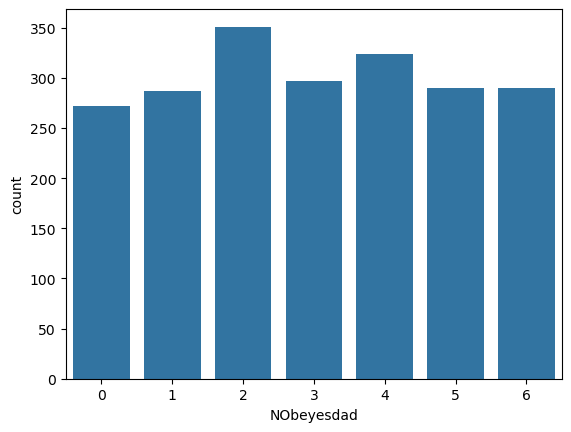

In [15]:
import seaborn as sns
sns.countplot(x=df['NObeyesdad'])

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.66      0.86      0.74        56
           1       0.68      0.27      0.39        62
           2       0.68      0.65      0.67        78
           3       0.73      0.98      0.84        58
           4       0.94      1.00      0.97        63
           5       0.65      0.61      0.63        56
           6       0.45      0.48      0.47        50

    accuracy                           0.70       423
   macro avg       0.69      0.69      0.67       423
weighted avg       0.69      0.70      0.68       423





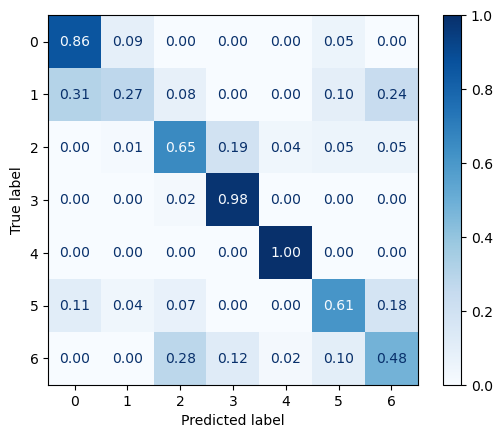

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.89      0.92      0.90        62
           2       0.99      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.96      0.96      0.96        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423





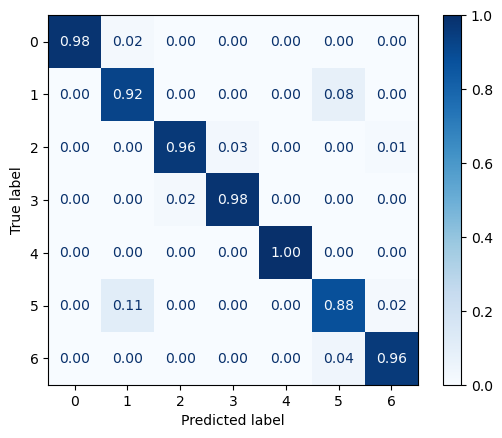

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.89      0.87      0.88        62
           2       0.97      0.92      0.95        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.88      0.91      0.89        56
           6       0.94      0.96      0.95        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423





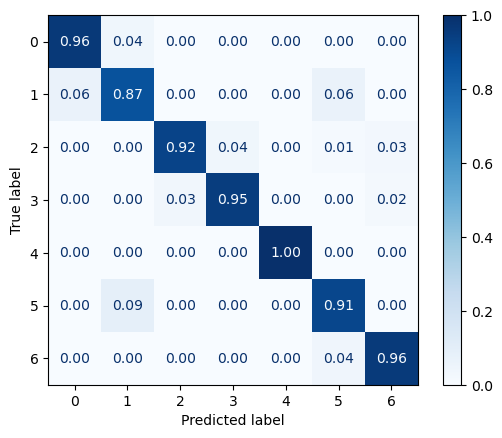

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.89      0.92        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.95      0.93        56
           6       1.00      0.98      0.99        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423





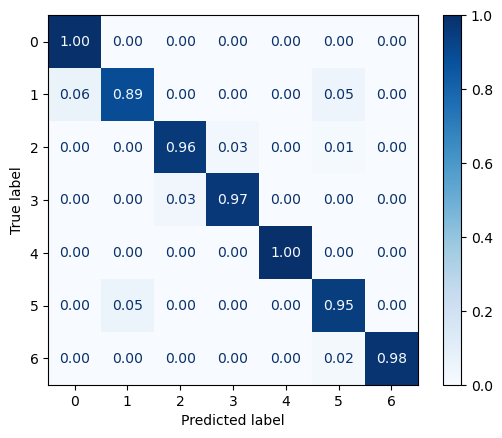

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        56
           1       0.93      0.81      0.86        62
           2       0.95      0.94      0.94        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.87      0.82      0.84        56
           6       0.85      0.90      0.87        50

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423





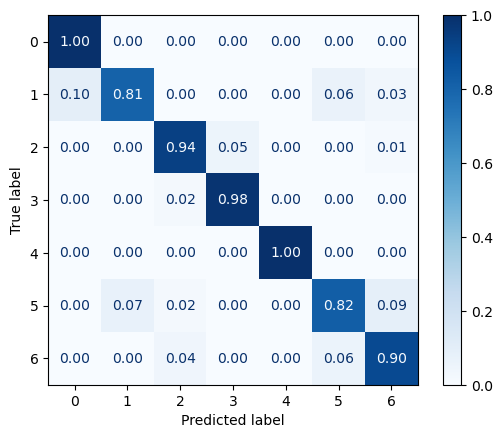

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.695035   0.692440  0.695035  0.676463  0.915410
Random Forest        0.955083   0.955618  0.955083  0.955266  0.997651
Decision Tree        0.938534   0.939043  0.938534  0.938573  0.964707
XGBoost              0.962175   0.962662  0.962175  0.962060  0.998881
MLP Classifier       0.921986   0.922434  0.921986  0.921017  0.995031


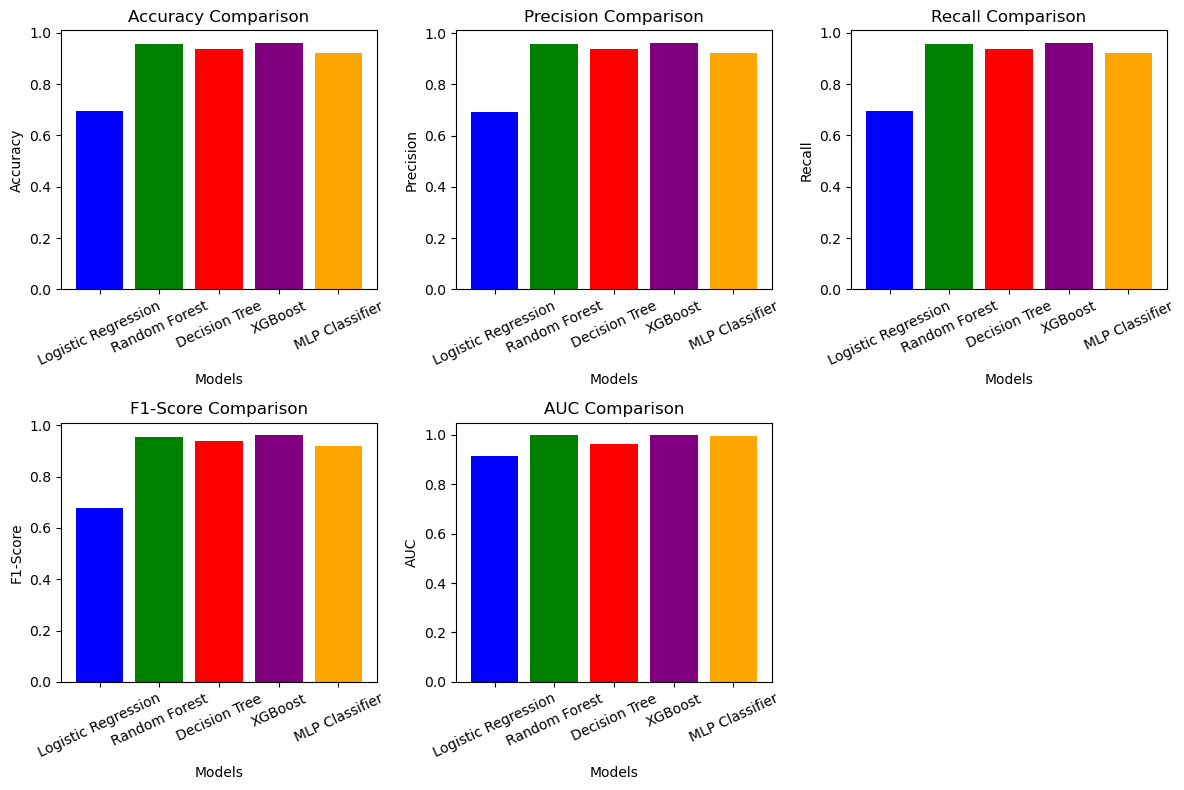

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,ConfusionMatrixDisplay


# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(multi_class="ovr"),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # Probability scores

    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics (use weighted for multi-class)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")  # Multi-class AUC

    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

# Plot histograms for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        68
           1       0.62      0.28      0.39        74
           2       0.61      0.57      0.59        68
           3       0.73      0.99      0.84        70
           4       0.93      1.00      0.96        74
           5       0.70      0.64      0.67        66
           6       0.60      0.56      0.58        72

    accuracy                           0.71       492
   macro avg       0.69      0.71      0.68       492
weighted avg       0.69      0.71      0.68       492





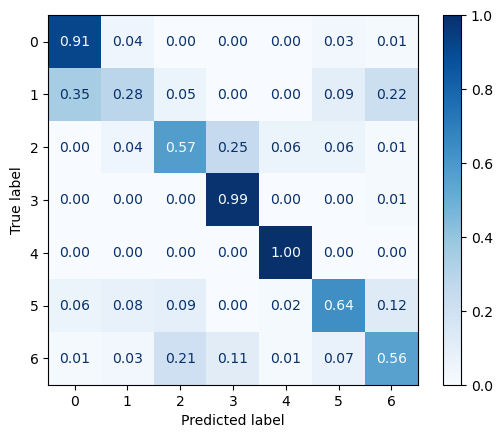

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.88      0.91      0.89        74
           2       0.97      0.97      0.97        68
           3       0.99      0.99      0.99        70
           4       1.00      1.00      1.00        74
           5       0.90      0.94      0.92        66
           6       0.99      0.93      0.96        72

    accuracy                           0.96       492
   macro avg       0.96      0.96      0.96       492
weighted avg       0.96      0.96      0.96       492





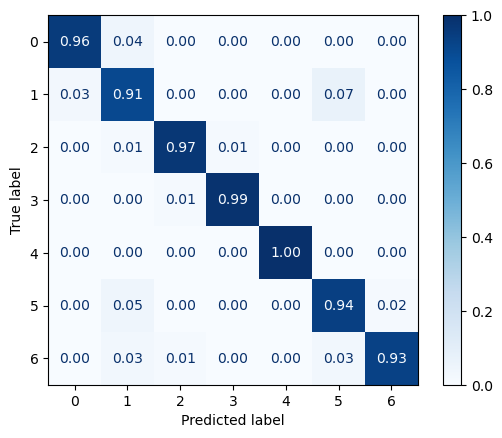

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.90      0.84      0.87        74
           2       0.87      0.91      0.89        68
           3       0.97      0.97      0.97        70
           4       1.00      1.00      1.00        74
           5       0.89      0.89      0.89        66
           6       0.93      0.90      0.92        72

    accuracy                           0.92       492
   macro avg       0.92      0.92      0.92       492
weighted avg       0.93      0.92      0.92       492





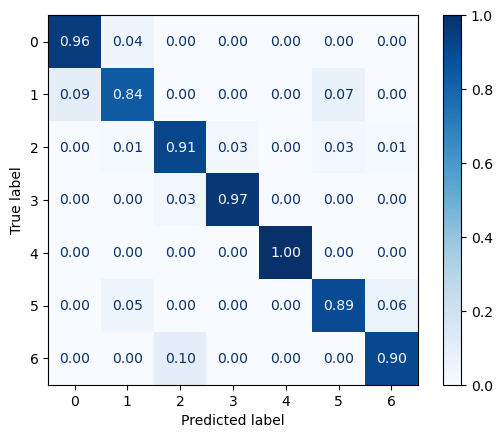

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.96      0.91      0.93        74
           2       0.96      0.96      0.96        68
           3       0.99      0.99      0.99        70
           4       1.00      1.00      1.00        74
           5       0.91      0.97      0.94        66
           6       1.00      0.97      0.99        72

    accuracy                           0.97       492
   macro avg       0.97      0.97      0.97       492
weighted avg       0.97      0.97      0.97       492





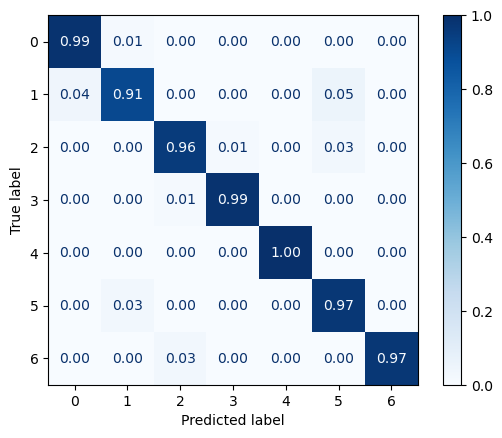

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       0.95      0.84      0.89        74
           2       0.97      0.94      0.96        68
           3       0.95      0.99      0.97        70
           4       1.00      1.00      1.00        74
           5       0.85      0.86      0.86        66
           6       0.89      0.94      0.92        72

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492





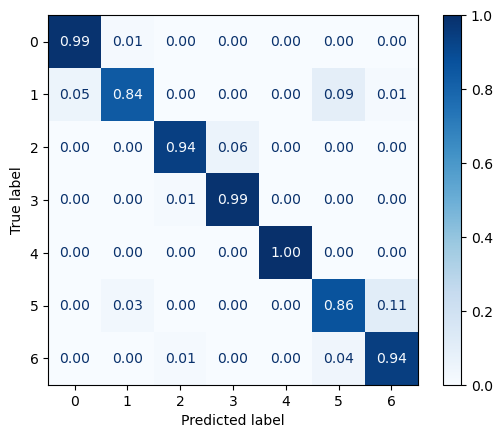

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.705285   0.694095  0.705285  0.684533  0.919170
Random Forest        0.955285   0.956204  0.955285  0.955538  0.997353
Decision Tree        0.924797   0.925039  0.924797  0.924569  0.956148
XGBoost              0.967480   0.968002  0.967480  0.967467  0.998661
MLP Classifier       0.936992   0.937861  0.936992  0.936605  0.997450


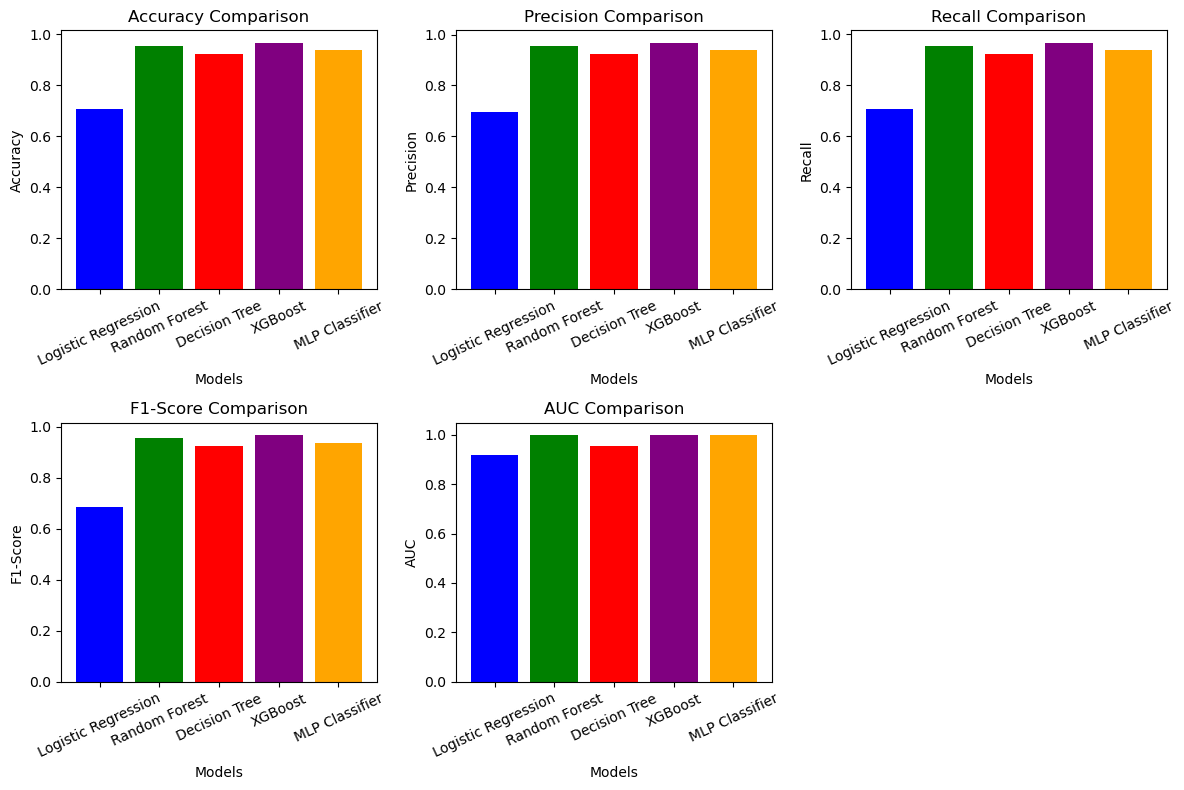

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(multi_class="ovr"),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # Probability scores

    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics (use weighted for multi-class)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")  # Multi-class AUC

    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

# Plot histograms for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


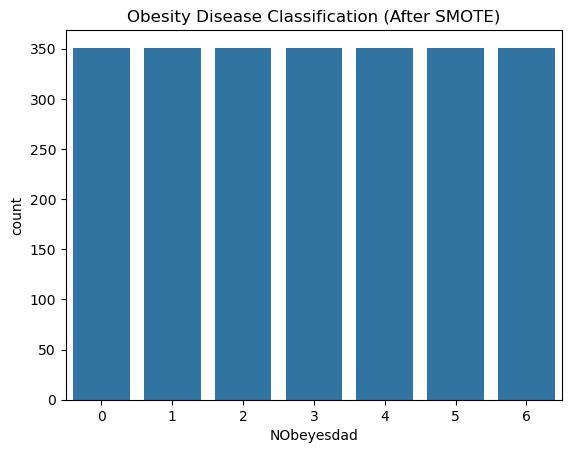

In [25]:
df_resampled = pd.DataFrame(y_resampled, columns=['NObeyesdad'])
sns.countplot(x=df_resampled['NObeyesdad'])
plt.title("Obesity Disease Classification (After SMOTE)")
plt.show()

100%|===================| 3437/3444 [01:01<00:00]        

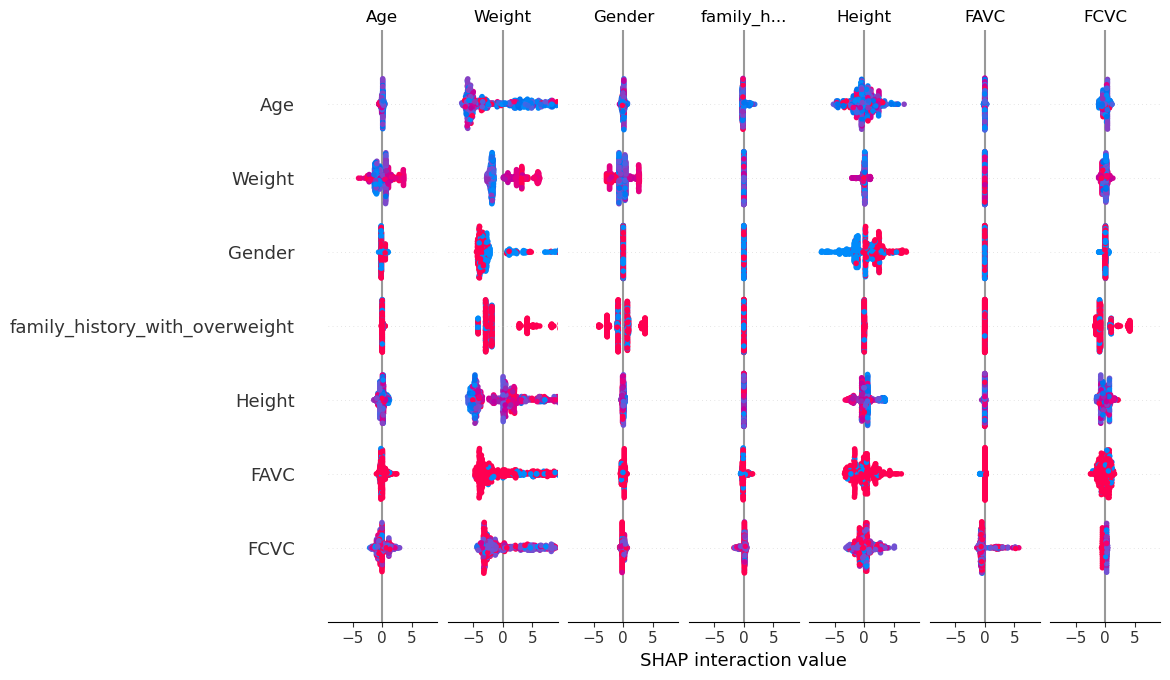

In [25]:
import shap
import pandas as pd

# STEP 1: Ensure your X_test is a DataFrame with proper column names
feature_names = df.drop(columns=['NObeyesdad']).columns.tolist()
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# STEP 2: Use TreeExplainer for XGBoost
explainer = shap.Explainer(models["XGBoost"], X_test_df)
shap_values = explainer(X_test_df)  # SHAP Explanation object

# STEP 3: Global Feature Importance (summary bar plot)
shap.summary_plot(shap_values.values, X_test_df, plot_type="bar")

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\U

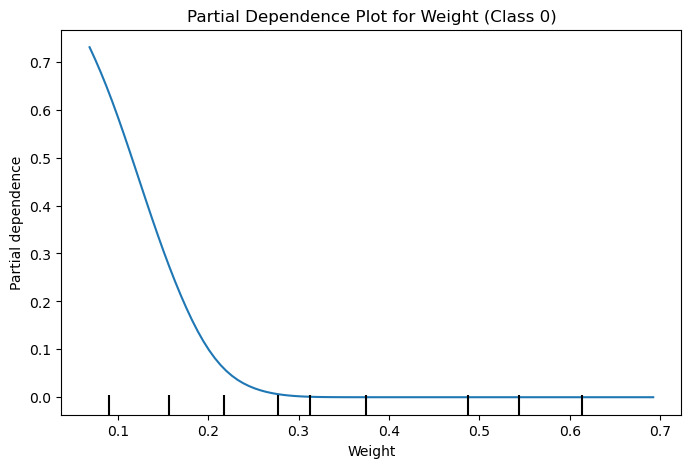

In [21]:

from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import shap


X_sample = X_test

if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)  # Replace `feature_names` with actual column names

# Select feature and target class
feature_name = "Weight"  # Change to desired feature
target_class = 0  # Choose class index (e.g., 0 for first class)

# Generate and plot Partial Dependence Plot
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    model, X_test, [feature_name], target=target_class, ax=ax  # Specify target class
)
plt.title(f"Partial Dependence Plot for {feature_name} (Class {target_class})")
plt.show()



🔍 Partial Dependence for Class: 0


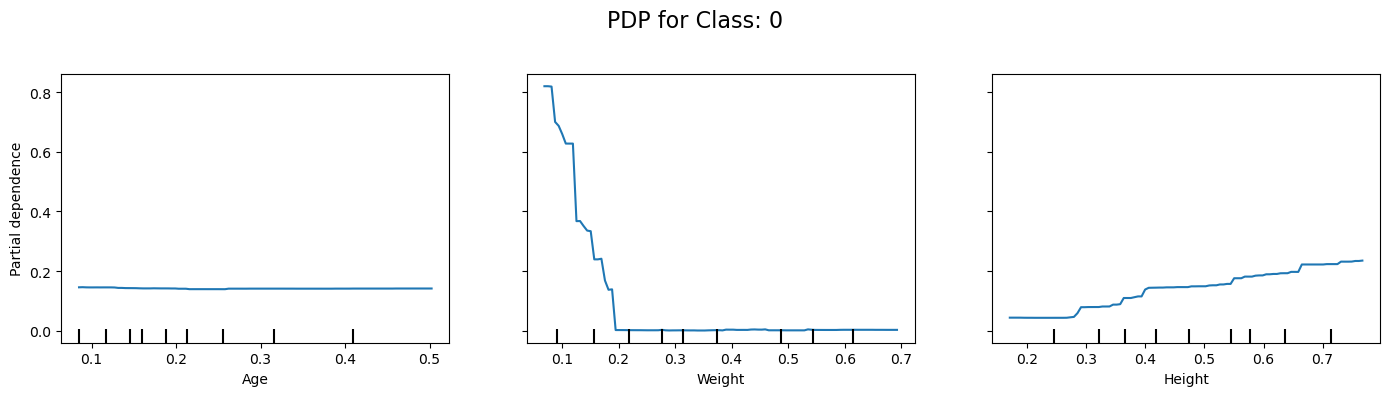


🔍 Partial Dependence for Class: 1


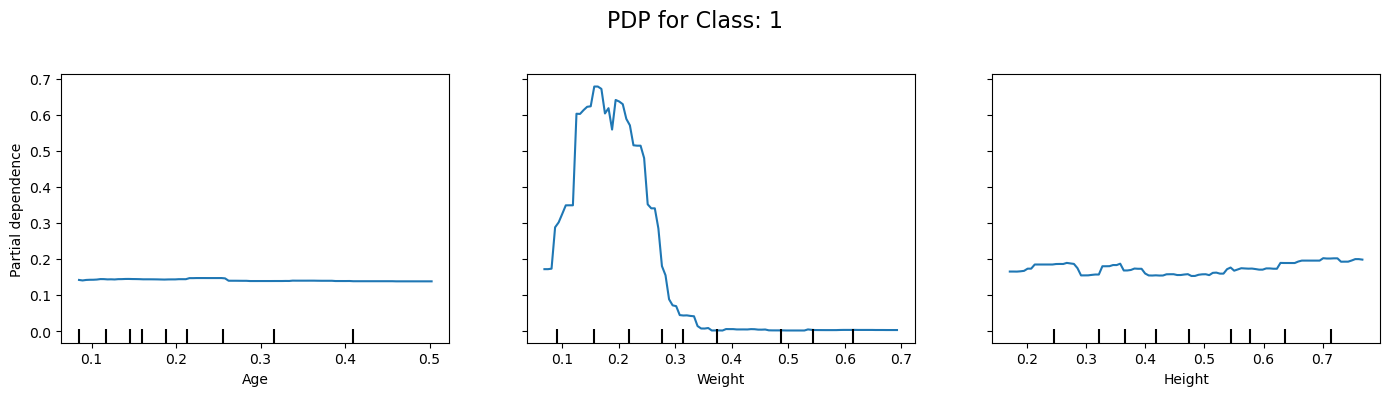


🔍 Partial Dependence for Class: 2


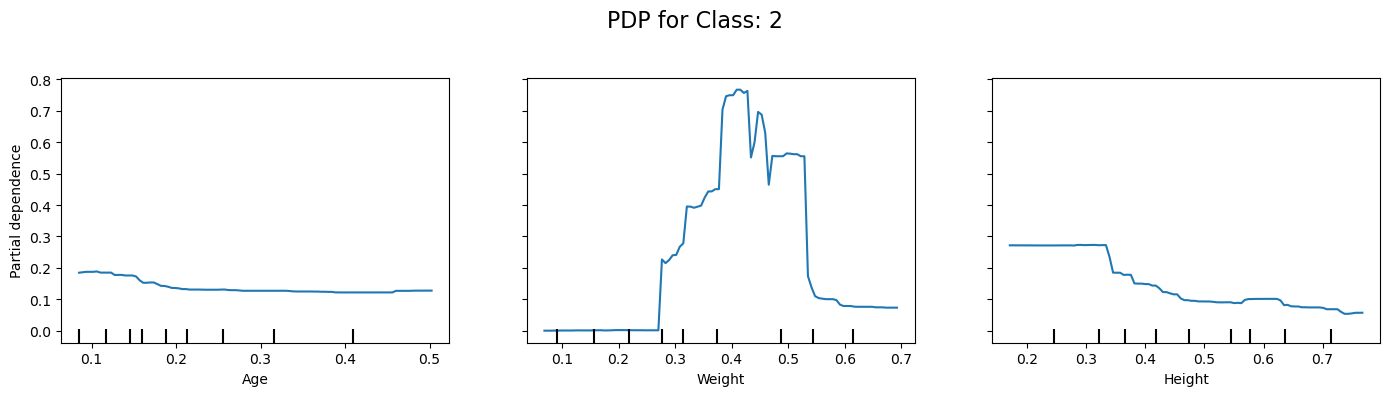


🔍 Partial Dependence for Class: 3


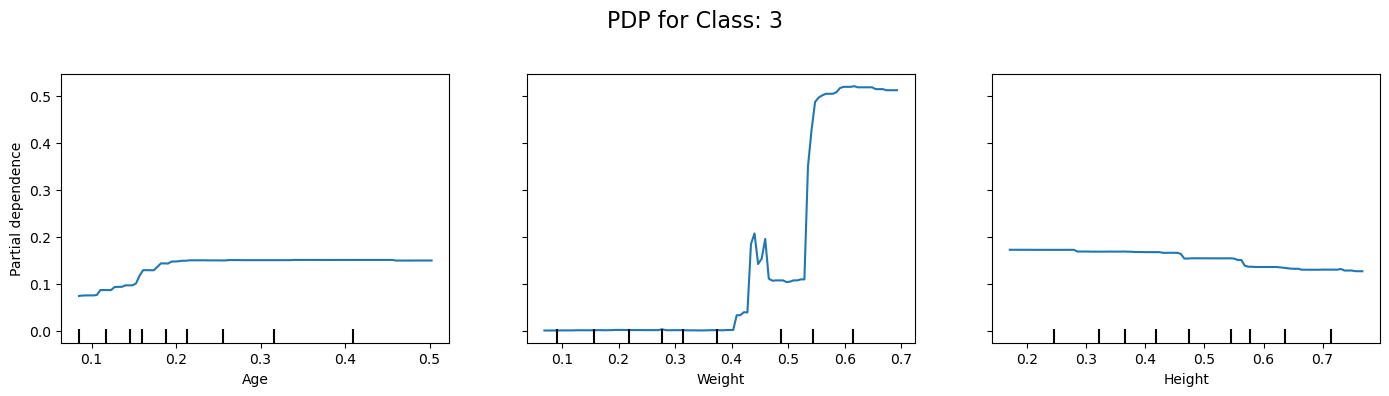


🔍 Partial Dependence for Class: 4


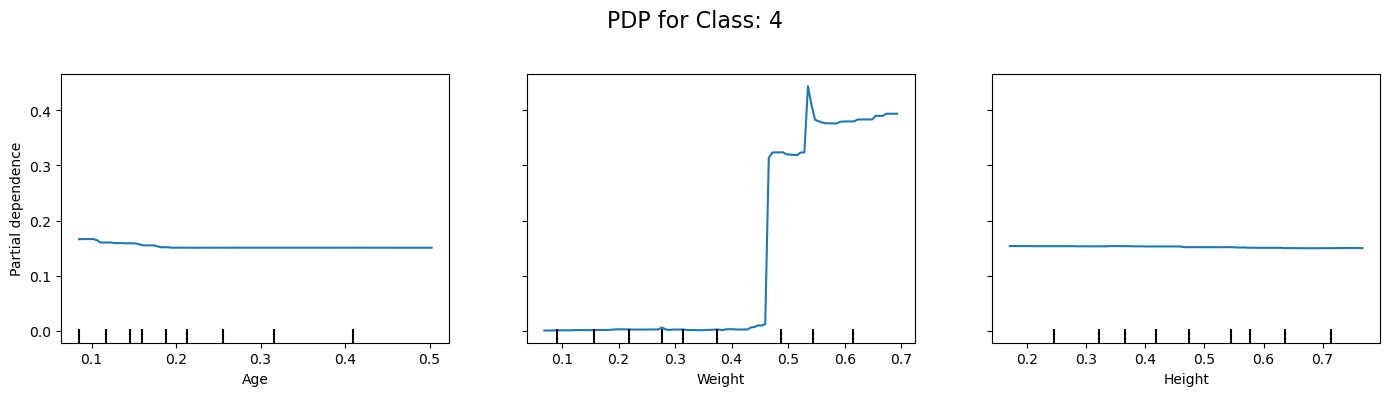


🔍 Partial Dependence for Class: 5


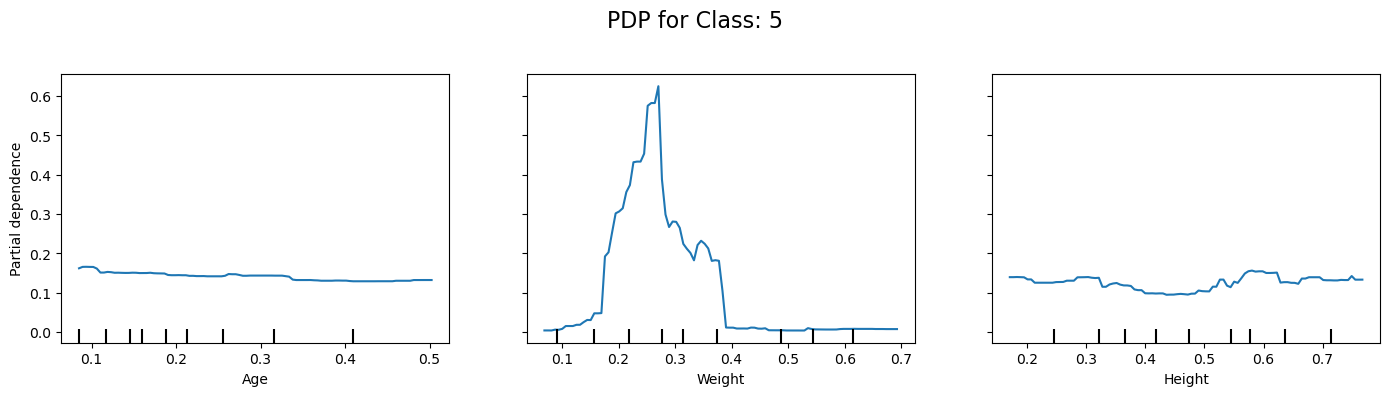


🔍 Partial Dependence for Class: 6


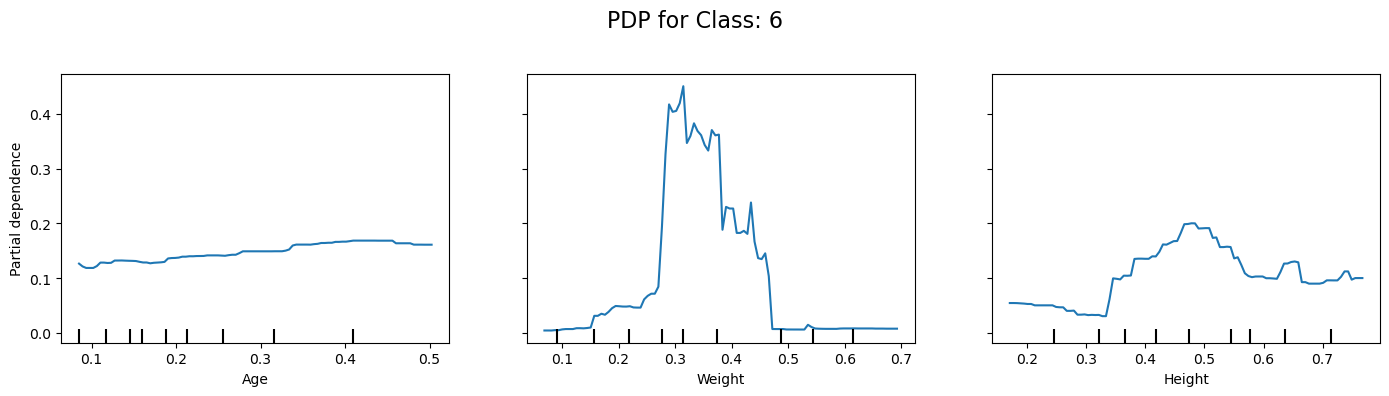

In [22]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1. Create labeled test DataFrame
feature_names = df.drop(columns=['NObeyesdad']).columns.tolist()
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# 2. Encode target to get class indices
le = LabelEncoder()
le.fit(y)  # Original unencoded target column before SMOTE
class_labels = le.classes_

# 3. Choose features to explain (either top SHAP features or manually)
features_to_plot = ['Age','Weight','Height']  # You can replace with SHAP-ranked features too

# 4. Loop through all classes
for i, class_label in enumerate(class_labels):
    print(f"\n🔍 Partial Dependence for Class: {class_label}")

    fig, ax = plt.subplots(figsize=(14, 4))
    PartialDependenceDisplay.from_estimator(
        models["XGBoost"],
        X_test_df,
        features=features_to_plot,
        feature_names=feature_names,
        target=i,
        ax=ax
    )

    plt.suptitle(f"PDP for Class: {class_label}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
